<h1 style = 'text-align: center'><b>Practice 04: Canonical Correlation Analysis</b></h1>

- Full name: Võ Nguyễn Hoàng Kim
- Student ID: 21127090

<h2><b>1. Required libraries</b></h2>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

<h2><b>2. Analyze the correlation between features of the dataset</b></h2>

<b>Request 01:</b> Students explain differences of correlation between sepal width / sepal length with petal related value
<br>Giải thích sự khác biệt về mối tương quna giữa sepal width/ length với các giá trị petal liên quan

<h3><b>2.1. Load Iris dataset</b></h3>

In [2]:
# load iris dataset with X (properties)
X, _ = load_iris(return_X_y = True, as_frame = True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<h3><b>2.2. Plot correlation coefficient among variables</b></h3>

<Axes: title={'center': 'Correlation coefficient among variables'}>

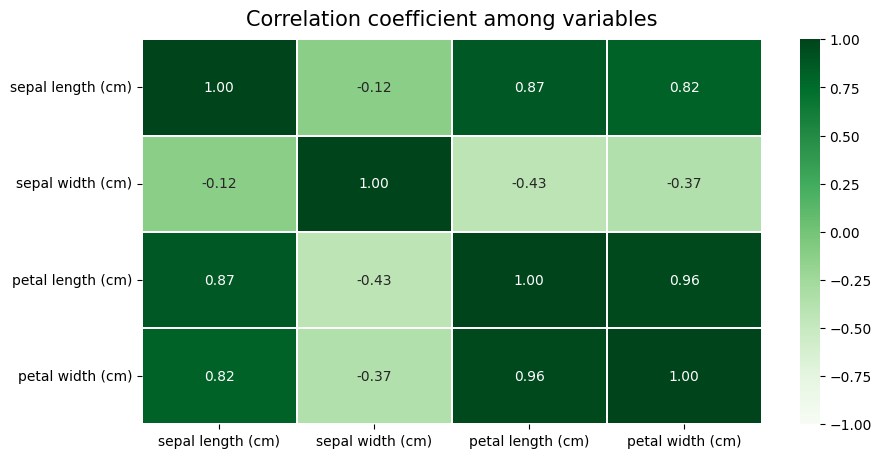

In [3]:
# compute correlation in X
X_correlation = X.corr()

# plot it by correlation diagram
plt.figure(figsize=(10, 5))
plt.title("Correlation coefficient among variables", size = 15, pad = 10)
sns.heatmap(X_correlation, cmap = 'Greens', annot = True, fmt = ".2f", linewidths = 0.2, vmin = -1, vmax = 1)

<h3><b>2.2. Scatter plot with regression line</b></h3>

Text(0, 0.5, 'Petal width')

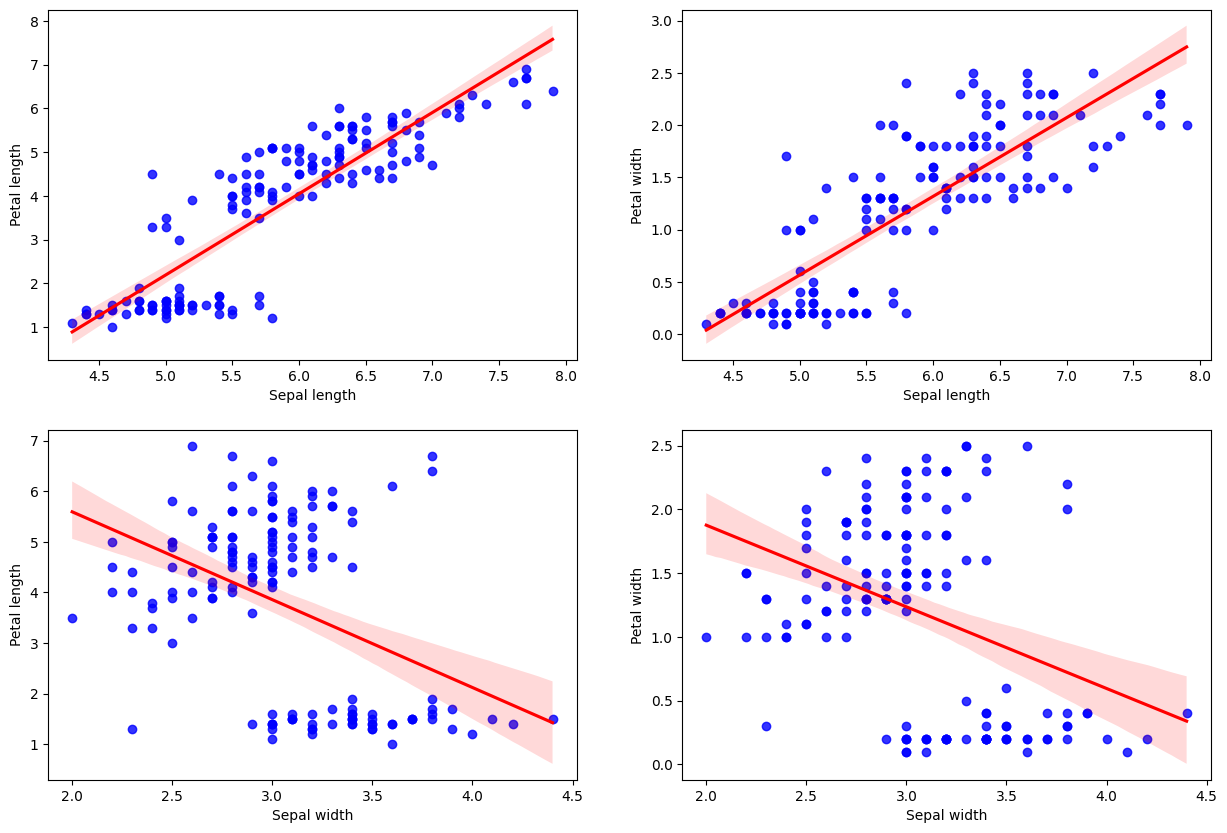

In [4]:
plt.figure(figsize=(15,10))

# Sepal length with petal length
plt.subplot(2,2,1)
sns.regplot(x=X.iloc[:, 0], y=X.iloc[:, 2], scatter=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Sepal length')
plt.ylabel('Petal length')

# Sepal length with petal width
plt.subplot(2,2,2)
sns.regplot(x=X.iloc[:, 0], y=X.iloc[:, 3], scatter=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Sepal length')
plt.ylabel('Petal width')

# Sepal width with petal length
plt.subplot(2,2,3)
sns.regplot(x=X.iloc[:, 1], y=X.iloc[:, 2], scatter=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Sepal width')
plt.ylabel('Petal length')

# Sepal width with petal width
plt.subplot(2,2,4)
sns.regplot(x=X.iloc[:, 1], y=X.iloc[:, 3], scatter=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Sepal width')
plt.ylabel('Petal width')

<h2><b>3. Run CCA using statsmodels, rcca package and skbio</b></h2>

<b>Request 02:</b> Students explain the important of scaling data.

<h3><b>3.1. Preprocessing data before applying CCA </b></h3>

In [5]:
# split dataset into 2 data frames: one containing only sepal-related features and one with only petal-related features
X1 = X.iloc[:, :2]              # sepal-related features
X2 = X.iloc[:, 2:]              # petal-related features

# scaling data for both datasets X1 and X2 
scaler = StandardScaler()
X1_scaler = scaler.fit_transform(X1) 
X2_scaler = scaler.fit_transform(X2)


print("X1 with (mean, std): ({}, {})".format(np.mean(X1_scaler), np.std(X1_scaler)))
print("X2 with (mean, std): ({}, {})".format(np.mean(X2_scaler), np.std(X2_scaler)))

X1 with (mean, std): (-5.684341886080802e-16, 1.0)
X2 with (mean, std): (-3.789561257387201e-16, 1.0)


<h3><b>3.2. Apply CCA on the scaled data </b></h3>

In [6]:
# number of components that we want to keep 
num_of_components = 2

# apply CCA on
myCCA = CCA(scale = False, n_components = num_of_components)
myCCA.fit(X1_scaler, X2_scaler)

# transform our datasets to obtain canonical variates
X1_c, X2_c = myCCA.transform(X1_scaler, X2_scaler)


<h2><b>4. Check the dependency between canonical variates by correlating canonical variate pairs</b></h2>

<b>Request 03:</b> Compare the first canonical variates pair and the second canonical variates pair. Which one should be analyze?


In [7]:

print(np.corrcoef(X1_c[:, 0], X2_c[:, 0]))
print(np.corrcoef(X1_c[:, 1], X2_c[:, 1]))


[[1.       0.940969]
 [0.940969 1.      ]]
[[1.         0.12393688]
 [0.12393688 1.        ]]


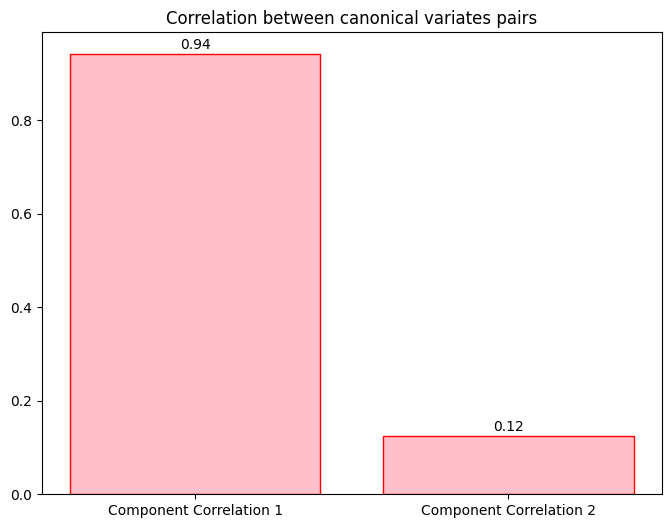

In [8]:
# check the dependency between canonical variates by correlating canonical variate pairs
component_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(num_of_components)]

# plot it by bar chart
plt.figure(figsize=(8, 6))
plt.title("Correlation between canonical variates pairs")
plt.bar(['Component Correlation 1', 'Component Correlation 2'], component_corr, color='pink', width = 0.8, edgecolor = 'red')
for i, v in enumerate(component_corr):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='center')

<h2><b>5. Analyzing the loading associated with each of our canonical variates</b></h2>

<b>Request 04:</b> Student draw conclusions based on the loadings table

<h3><b>5.1 Loadings table</b></h3>

In [9]:
# get loadings for canonical variate of X1 dataset (sepal data)
X1_loadings = myCCA.x_loadings_
#           comp1           comp2
# feat1 [[ 0.89224641,  0.3880084 ],        first feature has a strong, positive influences on the FIRST canonical variate (0.89)
# feat2  [-0.45786609,  0.92165584]])       second feature influences on the SECOND canonical variate (0.92)
# an array in shape (n_features, n_components) 

# get loadings for canonical variate of X2 dataset (petal data)
X2_loadings = myCCA.y_loadings_
#               comp1       comp2
# feat1     [[1.5732248 , 0.33270605],      both features has a STRONG, positive influence on the FIRST canonical variate (1.57 and 1.45)   
# feat2     [1.45353265, 0.94303059]]       the second feature influences on the SECOND canonical variate more than the first one (0.94 > 0.32)


X1_loadings = pd.DataFrame(X1_loadings)
X1_shape = X1_loadings.shape
X1_loadings.columns = ["Component {}".format(i+1) for i in range(num_of_components)]
X1_loadings.index = ["Feature {}".format(i+1) for i in range(X1_shape[1])]

X2_loadings = pd.DataFrame(X2_loadings)
X2_shape = X2_loadings.shape
X2_loadings.columns = ["Component {}".format(i+1) for i in range(num_of_components)]
X2_loadings.index = ["Feature {}".format(i+1) for i in range(X2_shape[1])]

print("X1 loadings \n",X1_loadings)
print()
print("X2 loadings \n",X2_loadings)

X1 loadings 
            Component 1  Component 2
Feature 1     0.892246     0.388008
Feature 2    -0.457866     0.921656

X2 loadings 
            Component 1  Component 2
Feature 1     1.573225     0.332706
Feature 2     1.453533     0.943031


<h3><b>5.2 Visualize the loadings table by heatmap</b></h3>

Text(905.5436507936508, 0.5, 'Features')

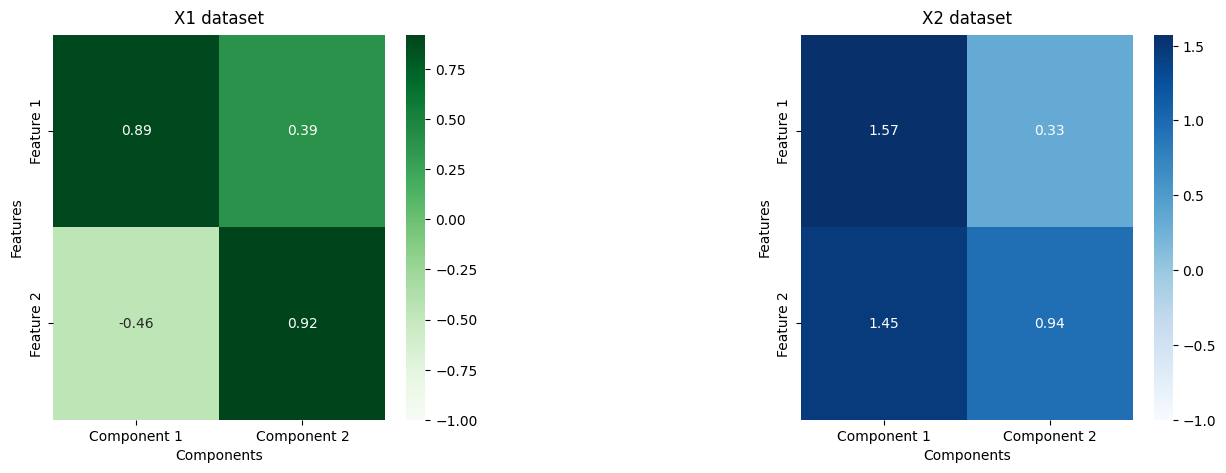

In [10]:
# Plot by heatmap
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.8)

plt.subplot(1,2,1)
sns.heatmap(X1_loadings, cmap = "Greens", vmin = -1, annot=True)
plt.title("X1 dataset", pad = 8)
plt.xlabel("Components")
plt.ylabel("Features")

plt.subplot(1, 2, 2)
sns.heatmap(X2_loadings, cmap = "Blues", vmin = -1, annot=True, fmt="0.2f")
plt.title("X2 dataset", pad = 8)
plt.xlabel("Components")
plt.ylabel("Features")


<h2><b>6. Analyze CCA coefficients </b></h2>

<h3><b>6.1. Check the version of Scikit-learn library</b></h3>

In [11]:
# check version of scikit-learn library
import sklearn
print("Version of Scikit-learn library:",sklearn.__version__)

Version of Scikit-learn library: 1.3.2


<h4><b>Notation</b></h4>

- I have got the warning like this "<b> FutureWarning</b> : The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features) "
- Therefore, with my version of sklearn library (1.3.2), I need to transpose the correlation coefficient matrix to be able to set X2 as columns and X1 as indices (corresponding to the sample code).
<br><br>



<b>Request 5:</b> Compare the heatmap at step 2 with this CCA coefficients

<h3><b>6.2. CCA coefficients</b></h3>

In [12]:
# analyze CCA coefficients
# get the CCA coefficients - its shape is (n_targets, n_features) in the version > 3.1 
cca_coef = myCCA.coef_

# transpose for CCA coefficients to change its shape into (n_features, n_target)
cca_coef = cca_coef.T


coef_df = pd.DataFrame(np.round(cca_coef, 2), columns = [X2.columns])
coef_df.index = X1.columns

coef_df

,petal length (cm),petal width (cm)
sepal length (cm),1.60,1.77
sepal width (cm),-0.31,0.28


<h3><b>6.3. Visualization</b></h3>

Text(0.5, 1.0, 'CCA correlation ')

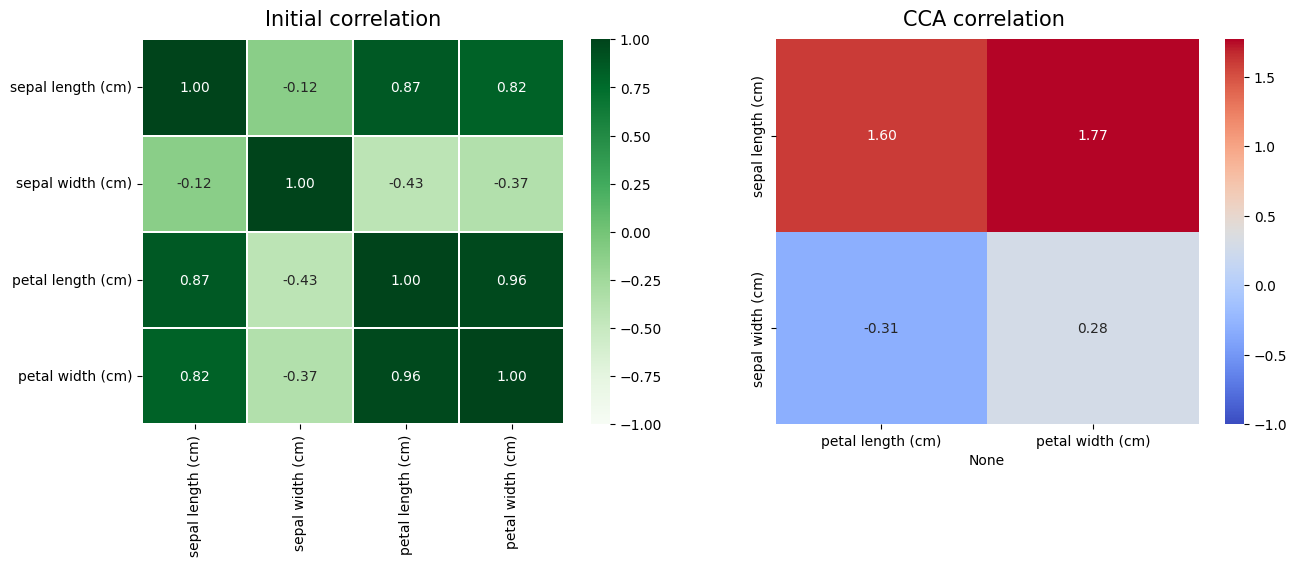

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title("Initial correlation", size = 15, pad = 10)
sns.heatmap(X_correlation, cmap = 'Greens', annot = True, fmt = ".2f", linewidths = 0.2, vmin = -1, vmax = 1)

plt.subplot(1, 2, 2)
sns.heatmap(coef_df, cmap = "coolwarm", annot=True, fmt="0.2f", vmin = -1)
plt.title("CCA correlation ", pad = 10, size = 15)
